In [7]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Eliminating 'anyCar' from the list of travel modes becuase it is redundant.

In [8]:
list_of_modes = ['dieselCar', 'petrolCar', 'taxi', 'motorbike', 'bus', 'transitRail', 'economyFlight', 'businessFlight', 'firstclassFlight', 'anyFlight' ]          
list_of_fuels = ['diesel', 'motorGasoline', 'motorGasoline', 'motorGasoline', 'diesel', 'diesel', 'jetFuel', 'jetFuel','jetFuel', 'aviationGasoline']




Use carbon_slc_nyc function to calculate carbon emissions for list_of_modes
    
    

In [9]:
def carbon_slc_nyc(type_list, fuel_list):
    """enter mode of transportation list and associated fuel type to calculate carbon emissions for round trip travel from new york to slc"""
    carbon_footprint = []
    carbon_dict = {}
    for x, y in zip(type_list, fuel_list):
        activity = 3910
        type_ = 'miles'
        mode = 'petrolCar'
        country = 'usa'
        url = f'https://api.triptocarbon.xyz/v1/footprint?activity={activity}&activityType={type_}&country={country}&mode={x}&fueltype={y}'
        response = requests.get(url)
        info = response.json()
        carbon = str(list(info.values()))
        carbon_footprint.append({x : carbon.strip("['']")})
    for d in carbon_footprint: 
        carbon_dict.update(d)
    return carbon_dict 

In [10]:
carbon_footprint = {}
carbon_footprint = carbon_slc_nyc(list_of_modes, list_of_fuels)
carbon_footprint

{'dieselCar': '1763.41',
 'petrolCar': '1528.81',
 'taxi': '899.30',
 'motorbike': '793.73',
 'bus': '418.37',
 'transitRail': '637.33',
 'economyFlight': '547.40',
 'businessFlight': '1180.82',
 'firstclassFlight': '1470.16',
 'anyFlight': '723.35'}

Turn dictionary into dataframe in preparation for plotting 

In [12]:
df = pd.DataFrame(list(carbon_footprint.items()))
df.rename(columns = {0 :'Type of Transport'}, inplace = True)
df.rename(columns = {1 :'Carbon_Footprint'}, inplace = True)
df['Carbon_Footprint'] = df['Carbon_Footprint'].astype('float64')


In [13]:
df

,Type of Transport,Carbon_Footprint
0,dieselCar,1763.41
1,petrolCar,1528.81
2,taxi,899.30
3,motorbike,793.73
4,bus,418.37
5,transitRail,637.33
6,economyFlight,547.40
7,businessFlight,1180.82
8,firstclassFlight,1470.16
9,anyFlight,723.35


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

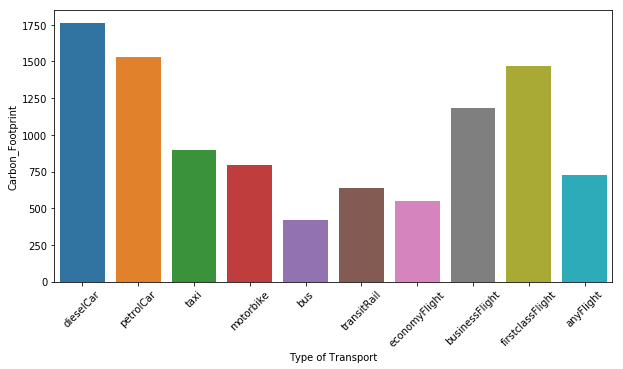

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Type of Transport'], y=df['Carbon_Footprint'])
plt.xticks(rotation=45)

Now, repeat process and compare to UK by calling carbon_uk function  

In [18]:
def carbon_uk(type_list, fuel_list):
    """enter mode of transportation list and associated fuel type to calculate travel carbon emissions for 3910 miles travel in UK"""
    carbon_footprint = []
    carbon_dict = {}
    for x, y in zip(type_list, fuel_list):
        activity = 3910
        type_ = 'miles'
        country = 'gbr'
        url = f'https://api.triptocarbon.xyz/v1/footprint?activity={activity}&activityType={type_}&country={country}&mode={x}&fueltype={y}'
        response = requests.get(url)
        info = response.json()
        carbon = str(list(info.values()))
        carbon_footprint.append({x : carbon.strip("['']")})
    for d in carbon_footprint: 
        carbon_dict.update(d)
    return carbon_dict

In [19]:
carbon_footprint_uk = {}
carbon_footprint_uk = carbon_uk(list_of_modes, list_of_fuels)
df_ground_uk = pd.DataFrame(list(carbon_footprint_uk.items()))
df_ground_uk.rename(columns = {0 :'Type of Transport (UK)'}, inplace = True)
df_ground_uk.rename(columns = {1 :'Carbon_Footprint_UK'}, inplace = True)
df_ground_uk['Carbon_Footprint_UK'] = df_ground_uk['Carbon_Footprint_UK'].astype('float64')
df_ground_uk

,Type of Transport (UK),Carbon_Footprint_UK
0,dieselCar,1223.83
1,petrolCar,1321.58
2,taxi,954.04
3,motorbike,727.26
4,bus,836.74
5,transitRail,477.02
6,economyFlight,547.40
7,businessFlight,1180.82
8,firstclassFlight,1470.16
9,anyFlight,723.35


Repeat process for world/default averages by using carbon_world function

In [21]:
def carbon_world(type_list, fuel_list):
    """enter mode of transportation list and associated fuel type to calculate travel carbon emissions for 3910 miles travel according to default/world average"""
    carbon_footprint = []
    carbon_dict = {}
    for x, y in zip(type_list, fuel_list):
        activity = 3910
        type_ = 'miles'
        country = 'def'
        url = f'https://api.triptocarbon.xyz/v1/footprint?activity={activity}&activityType={type_}&country={country}&mode={x}&fueltype={y}'
        response = requests.get(url)
        info = response.json()
        carbon = str(list(info.values()))
        carbon_footprint.append({x : carbon.strip("['']")})
    for d in carbon_footprint: 
        carbon_dict.update(d)
    return carbon_dict

In [22]:
carbon_footprint_world = {}
carbon_footprint_world = carbon_world(list_of_modes, list_of_fuels)
df_ground_world = pd.DataFrame(list(carbon_footprint_world.items()))
df_ground_world.rename(columns = {0 :'Type of Transport (World)'}, inplace = True)
df_ground_world.rename(columns = {1 :'Carbon_Footprint_World'}, inplace = True)
df_ground_world['Carbon_Footprint_World'] = df_ground_world['Carbon_Footprint_World'].astype('float64')
df_ground_world

,Type of Transport (World),Carbon_Footprint_World
0,dieselCar,1759.50
1,petrolCar,1493.62
2,taxi,899.30
3,motorbike,782.00
4,bus,418.37
5,transitRail,637.33
6,economyFlight,547.40
7,businessFlight,1180.82
8,firstclassFlight,1470.16
9,anyFlight,723.35


Create and plot joined dataframes to compare between usa, uk, and world.

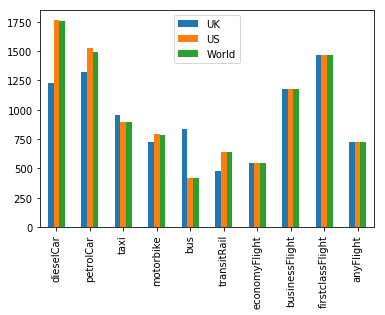

In [24]:
pd.concat({
    'US': df.set_index('Type of Transport').Carbon_Footprint, 'UK': df_ground_uk.set_index('Type of Transport (UK)').Carbon_Footprint_UK, 'World': df_ground_world.set_index('Type of Transport (World)').Carbon_Footprint_World
}, axis=1).plot.bar()




In [35]:
def carbon_fuel(fuel_gallons, fuel_type):
    """enter amount of fuel in gallons and fuel type to obtain carbon footprint for journey """
    carbon_footprint = []
    carbon_dict = {}
    for x, y in zip(fuel_gallons, fuel_type):
        url = f'https://api.triptocarbon.xyz/v1/footprint?activity={x}&activityType=fuel&country=usa&fuelType={y}'
        response = requests.get(url)
        info = response.json()
        carbon = str(list(info.values()))
        carbon_footprint.append({y : carbon.strip("['']")})
    for d in carbon_footprint: 
        carbon_dict.update(d)
    return carbon_dict 

In [42]:
#miles per seat gallon divided by seats on the plane 
A220_mpg_A = (85.6 / 140) 
suburu_mpg_A = 33 
greyhound_mpg_A = 6
A220_gal_A = 3910/A220_mpg_A
suburu_gal_A = 3910/suburu_mpg_A
greyhound_gal_A = 3910/greyhound_mpg_A
list_gallons_A = [suburu_gal_A, greyhound_gal_A, A220_gal_A]
list_fuel_type_A = ['motorGasoline', 'diesel', 'jetFuel']
#call API and create dataframe 
carbon_footprint_A = {}
carbon_footprint_A = carbon_fuel(list_gallons_A, list_fuel_type_A) 
df_A = pd.DataFrame(list(carbon_footprint_A.items()))
df_A.rename(columns = {0 :'Fuel_Type'}, inplace = True)
df_A.rename(columns = {1 :'Carbon_Footprint'}, inplace = True)
df_A['Carbon_Footprint'] = df_A['Carbon_Footprint'].astype('float64')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

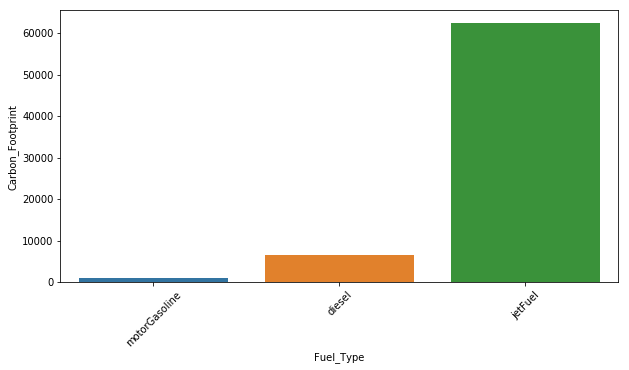

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_A['Fuel_Type'], y=df_A['Carbon_Footprint'])
plt.xticks(rotation=45)

In [45]:
#now adjust to miles per seat gallon
A220_mpg_B = 85.6 
suburu_mpg_B = 33 
#adjusting to miles per seat gallon with 55 seats
greyhound_mpg_B = 6 * 55 
A220_gal_B = 3910/A220_mpg_B
suburu_gal_B = 3910/suburu_mpg_B
greyhound_gal_B = 3910/greyhound_mpg_B
list_gallons_B = [suburu_gal_B, greyhound_gal_B, A220_gal_B]
list_fuel_type_B = ['motorGasoline', 'diesel', 'jetFuel']
#call API and create dataframe
carbon_footprint_B = {}
carbon_footprint_B = carbon_fuel(list_gallons_B, list_fuel_type_B)
df_B = pd.DataFrame(list(carbon_footprint_B.items()))
df_B.rename(columns = {0 :'Fuel_Type'}, inplace = True)
df_B.rename(columns = {1 :'Carbon_Footprint'}, inplace = True)
df_B['Carbon_Footprint'] = df_B['Carbon_Footprint'].astype('float64')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

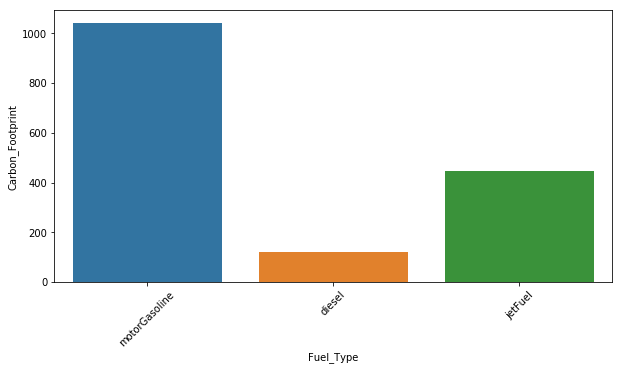

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_B['Fuel_Type'], y=df_B['Carbon_Footprint'])
plt.xticks(rotation=45)